# Audio Manipulation Notebook
This notebook contains cells for manipulating and inspecting an audio file. 

This notebook was created and tested using the following packages and versions:
* Python 3.6.1
* IPython 5.3.0
* Jupyter Notebook 5.0.0
* Matplotlib 2.0.2
* NumpPy 1.12.1
* IPyWidgets 6.0.0
* SciPy 0.19.0

In [1]:
import numpy as np
import scipy.io.wavfile as siw
import scipy.signal as sg
import scipy.fftpack as fp
import matplotlib.pyplot as plt
import ipywidgets as widgets
import audio_tools as at
import os
from io import BytesIO
from IPython.display import Audio, display, clear_output
%matplotlib inline

In [2]:
def plot_audio(data, rate):
    """Displays a plot of the given audio data.
    
    Arguments:
        * data: Raw data array
        * rate: Recorded rate of audio
        
    Returns:
        * None        
    """
    t = np.linspace(0, len(data)/rate, len(data))
    plt.plot(t, data)    

### Audio loading

The following cell displays a text input for the audio file to manipulate.

* The audio file should be in WAV format
* If the audio source has multiple channels only the first channel is used
* The loaded file is used in the following cells

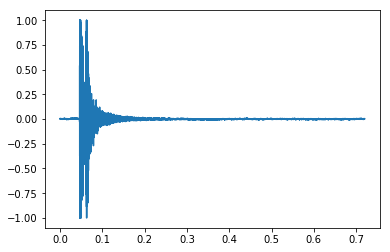

In [3]:
global editing_audio_data
global editing_audio_rate
global editing_audio_path
editing_audio_path = '../data/examples/clank.wav'
editing_audio_rate, editing_audio_data = at.load_audio(editing_audio_path)
plot_audio(editing_audio_data, editing_audio_rate)

ea_t = widgets.Text(
    value=editing_audio_path,
    description='Audio File',
    continuous_update=False)

def ea_t_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global editing_audio_path
        clear_output()
        editing_audio_path = change['new']
        if os.path.isfile(editing_audio_path):
            global editing_audio_data
            global editing_audio_rate
            editing_audio_rate, editing_audio_data = at.load_audio(
                editing_audio_path)
            plot_audio(editing_audio_data, editing_audio_rate)
   
ea_t.observe(ea_t_on_change)
display(ea_t)

### Audio Playback
The next cell can be used can be play the loaded audio back

NOTE: Not all browsers may support audio playback

In [4]:
display(Audio(editing_audio_data, rate=editing_audio_rate, autoplay=False))

### Butterworth Filter

The following cell applies a Butterworth filter to the loaded audio data.

* The cutoff frequency is adjustable by a slider
* By default a low-pass filter is applied
* Selecting the toggle button applies a high-pass filter
* The original signal is plotted as blue
* The filtered signal is plotted as orange overtop the original

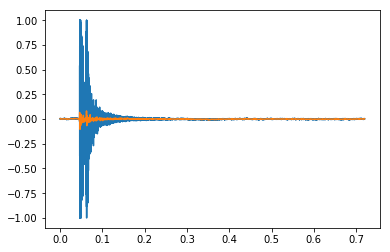

In [5]:
global filtered_audio_data
global filter_cutoff
global filter_type
filter_cutoff = 1000
filter_type = False
filtered_audio_data = at.apply_butter_filter(
    editing_audio_data, 
    editing_audio_rate,
    filter_cutoff, 
    filter_type)
plot_audio(editing_audio_data, editing_audio_rate)
plot_audio(filtered_audio_data, editing_audio_rate)

fa_fs = widgets.FloatSlider(
    value=filter_cutoff,
    min=0,
    max=10000,
    description="Threshold",
    disabled=False,
    continuous_update=False,
    orientation='horizontal')

def fa_fs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global filtered_audio_data
        global editing_audio_data
        global editing_audio_rate
        global filter_cutoff
        global filter_type
        clear_output()
        filter_cutoff = change['new']
        filtered_audio_data = at.apply_butter_filter(
            editing_audio_data, 
            editing_audio_rate,
            filter_cutoff, 
            filter_type)
        plot_audio(editing_audio_data, editing_audio_rate)
        plot_audio(filtered_audio_data, editing_audio_rate)
        
fa_tb = widgets.ToggleButton(
    value=False,
    description='High Pass',
    disabled=False)

def fa_tb_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global filtered_audio_data
        global editing_audio_data
        global editing_audio_rate
        global filter_cutoff
        global filter_type
        clear_output()
        filter_type = change['new']
        filtered_audio_data = at.apply_butter_filter(
            editing_audio_data, 
            editing_audio_rate,
            filter_cutoff, 
            filter_type)
        plot_audio(editing_audio_data, editing_audio_rate)
        plot_audio(filtered_audio_data, editing_audio_rate)
        
fa_fs.observe(fa_fs_on_change)  
fa_tb.observe(fa_tb_on_change)
filter_controls = widgets.HBox([fa_fs, fa_tb])
display(filter_controls)

In [6]:
display(Audio(filtered_audio_data, rate=editing_audio_rate, autoplay=False))

In [7]:
def plot_audio_frequency(data, rate):
    """Displays a plot of the frequency of a signal, and the original 
    signal. 
    
    Arguments:
        * data: Raw data array
        * rate: Recorded rate of audio
        
    Returns:
        * None        
    """
    plt.subplot(2,1,1)
    t = np.linspace(0, len(data)/rate, len(data))
    plt.plot(t, data) 
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Amplitude')    
    plt.subplot(2,1,2)
    freq, db = at.calc_freq(data, rate)
    plt.plot(freq, db)
    plt.xlim(50, 20000)
    plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('dB')    

### Frequency Data

The next two cells can be used to inspect the frequency data of a digital signal.
* The sample_size value determines how large of a buffer is examined
* The slider can then be used to shift through the different portions of the audio data

In [8]:
global sample_size
sample_size = 4000

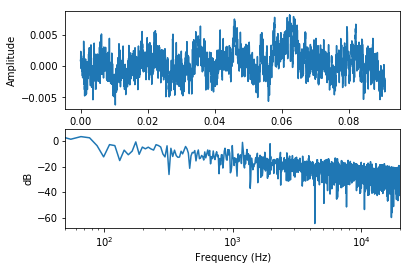

In [9]:
filter_cutoff = 1000
plot_audio_frequency(editing_audio_data[0:sample_size], editing_audio_rate)

freq_is = widgets.IntSlider(
    value=0,
    min=0,
    max=len(editing_audio_data) - sample_size,
    description="Segment",
    disabled=False,
    continuous_update=False,
    orientation='horizontal')
    
def freq_is_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global editing_audio_data
        global editing_audio_rate
        global sample_size
        clear_output()
        start = change['new']
        end = start + sample_size
        plot_audio_frequency(editing_audio_data[start:end], 
                             editing_audio_rate)
        
freq_is.observe(freq_is_on_change)
display(freq_is)